#  <b><span style="color:#7689de"><center> Laptop price dataset EDA and Model </span></b> </center>
### <span style="color:#5c374c"><center>   Predicting prices of laptops </span></b> </center>


   

<span> <center><img src="https://png.pngtree.com/png-vector/20191026/ourmid/pngtree-laptop-icon-png-image_1871608.jpg" /></span>

In [ ]:
!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import regex as re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


# Plot style
plt.style.use("seaborn-whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
df = pd.read_csv('laptop_price.csv')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Univarite Visulaization:

Visulize each Features spearately to understand well the dataset

In [4]:
df['Company'].value_counts().sort_values(ascending=False)

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

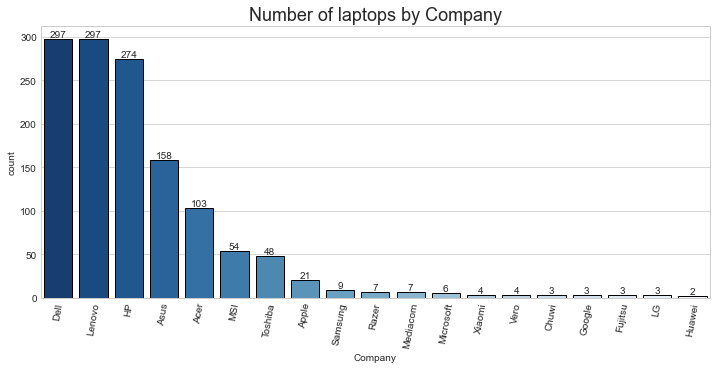

In [5]:
fig, ax = plt.subplots(figsize=(12,5))
ax=sns.countplot(x='Company', data=df, palette='Blues_r', order = df['Company'].value_counts().index,
                edgecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by Company',fontsize=18)
plt.show()


Most of laptops are from Dell, Lenovo and HP. and least laptops comany from Hauawei

In [6]:
Top_Ten_Product=df['Product'].value_counts().sort_values(ascending=False).head(10)
Top_Ten_Product

XPS 13                30
Inspiron 3567         29
250 G6                21
Legion Y520-15IKBN    19
Vostro 3568           19
Inspiron 5570         18
ProBook 450           18
Alienware 17          15
Inspiron 5567         14
Satellite Pro         13
Name: Product, dtype: int64

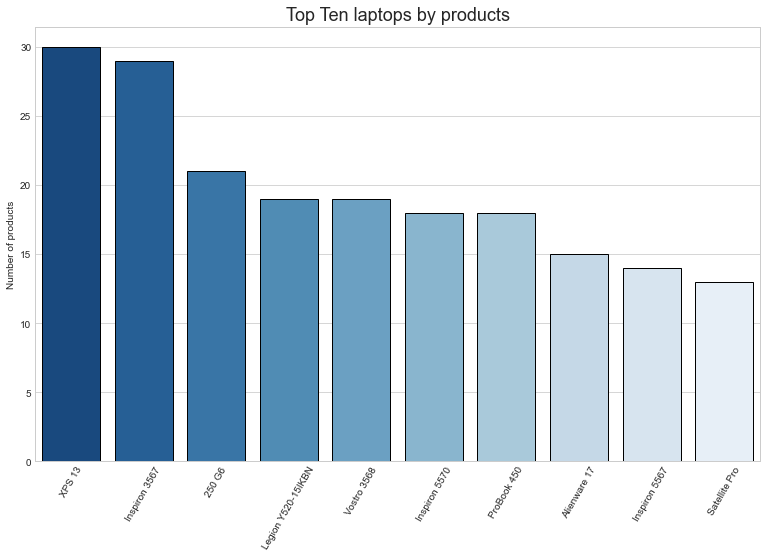

In [7]:
# plot the Top Ten laptops products,

# Set the width and height of the figure
plt.figure(figsize=(13,8))

# Add title
plt.title("Top Ten laptops by products",fontsize=18)

sns.barplot(x=Top_Ten_Product.index,y=Top_Ten_Product, palette='Blues_r', ci=False,
                edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=60)

# Add label for vertical axis
plt.ylabel("Number of products");

In [8]:
laptop_type=df['TypeName'].value_counts().sort_values(ascending=False)
laptop_type

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

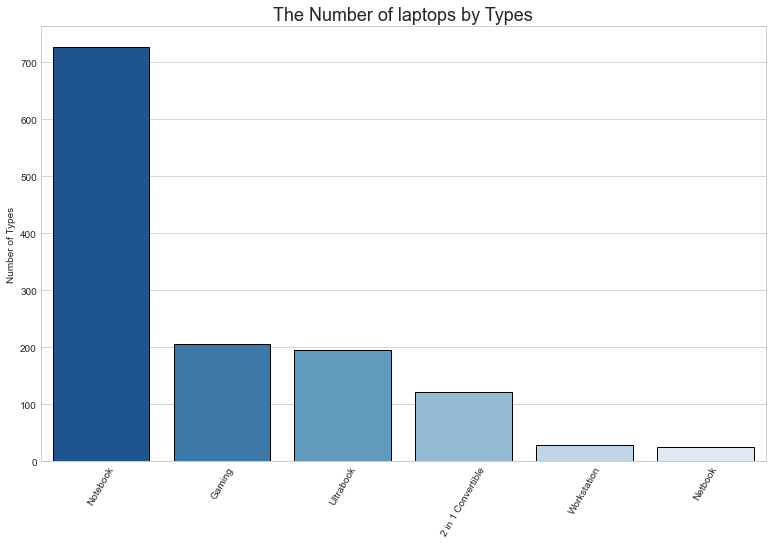

In [9]:
# plot Number of laptops by Types,

# Set the width and height of the figure
plt.figure(figsize=(13,8))

# Add title
plt.title("The Number of laptops by Types",fontsize=18)

sns.barplot(x=laptop_type.index,y=laptop_type, palette='Blues_r', ci=False,
                edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=60)

# Add label for vertical axis
plt.ylabel("Number of Types");

Most laptops are notebooks, which make 55.84% of the total laptops

In [10]:
laptop_Inches=df['Inches'].value_counts().sort_values(ascending=False)
laptop_Inches

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

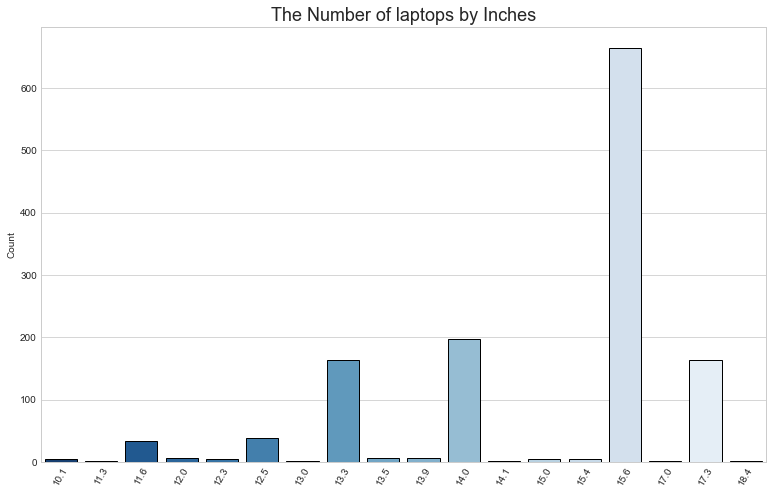

In [11]:
# plot Number of laptops by Inches,

# Set the width and height of the figure
plt.figure(figsize=(13,8))

# Add title
plt.title("The Number of laptops by Inches",fontsize=18)

sns.barplot(x=laptop_Inches.index,y=laptop_Inches, palette='Blues_r',ci=False,
                edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=60)

# Add label for vertical axis
plt.ylabel("Count");

Most laptops have 15.6 inches, which make 51.08% of the total laptops


In [12]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [13]:
laptops_ScreenResolution=df['ScreenResolution'].value_counts().sort_values(ascending=False)
laptops_ScreenResolution

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

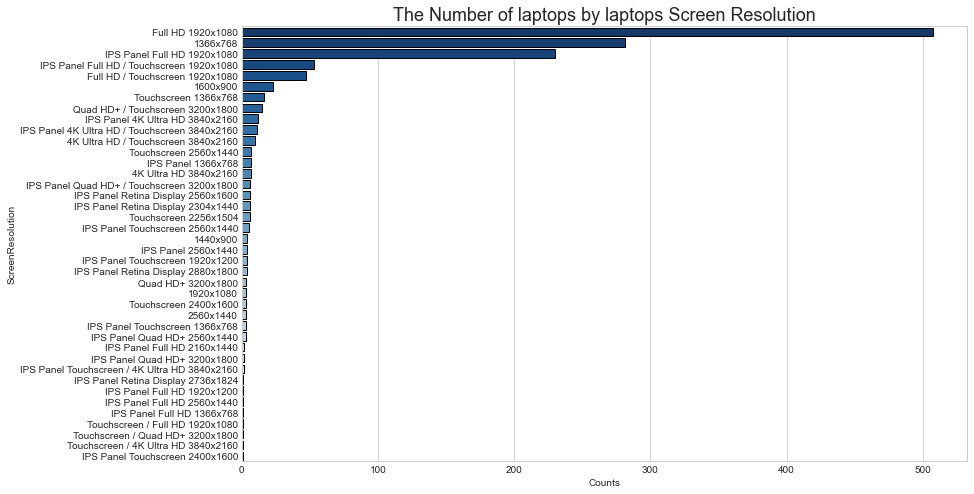

In [14]:
# plot Number of laptops by laptops_ScreenResolution,

# Set the width and height of the figure
plt.figure(figsize=(13,8))

# Add title
plt.title("The Number of laptops by laptops Screen Resolution",fontsize=18)

sns.barplot(y=laptops_ScreenResolution.index,x=laptops_ScreenResolution, palette='Blues_r',ci=False,
                edgecolor="black")
# Add label for Horizental axis
plt.xlabel("Counts");
# Add label for vertical axis
plt.ylabel("ScreenResolution");

In [15]:
laptops_Cpu=df['Cpu'].value_counts().sort_values(ascending=False).head(10)
laptops_Cpu

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
Intel Core i5 6200U 2.3GHz      68
Intel Core i3 6006U 2GHz        64
Intel Core i7 6500U 2.5GHz      49
Intel Core i7 6700HQ 2.6GHz     43
Intel Core i3 7100U 2.4GHz      37
Name: Cpu, dtype: int64

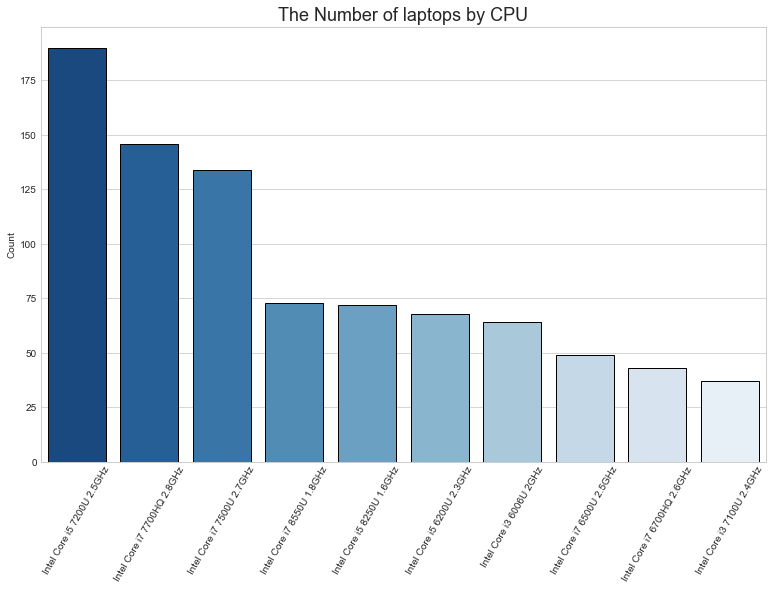

In [16]:
# plot Number of laptops by CPU,

# Set the width and height of the figure
plt.figure(figsize=(13,8))

# Add title
plt.title("The Number of laptops by CPU",fontsize=18)

sns.barplot(x=laptops_Cpu.index,y=laptops_Cpu, palette='Blues_r', ci=False,
                edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=60)

# Add label for vertical axis
plt.ylabel("Count");

In [17]:
laptops_Ram=df['Ram'].value_counts().sort_values(ascending=False)
laptops_Ram

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

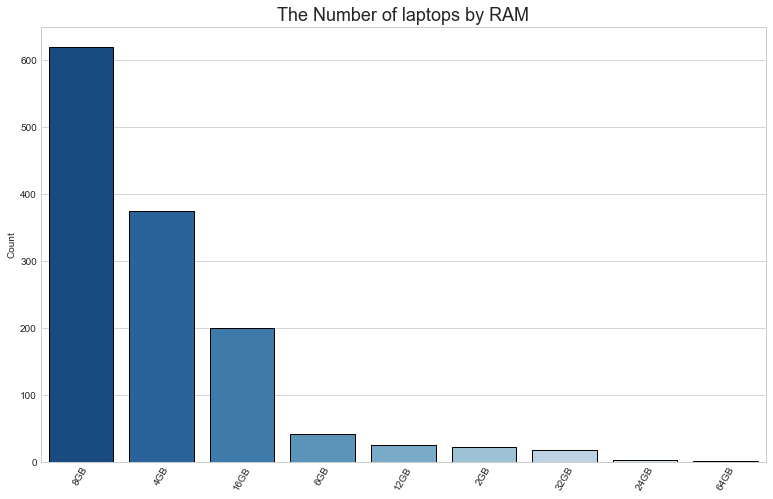

In [18]:
# plot Number of laptops by RAM,

# Set the width and height of the figure
plt.figure(figsize=(13,8))

# Add title
plt.title("The Number of laptops by RAM",fontsize=18)

sns.barplot(x=laptops_Ram.index,y=laptops_Ram, palette='Blues_r', ci=False,
                edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=60)

# Add label for vertical axis
plt.ylabel("Count");

In [19]:
laptops_Memory=df['Memory'].value_counts().sort_values(ascending=False)
laptops_Memory

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
128GB HDD                          1
5

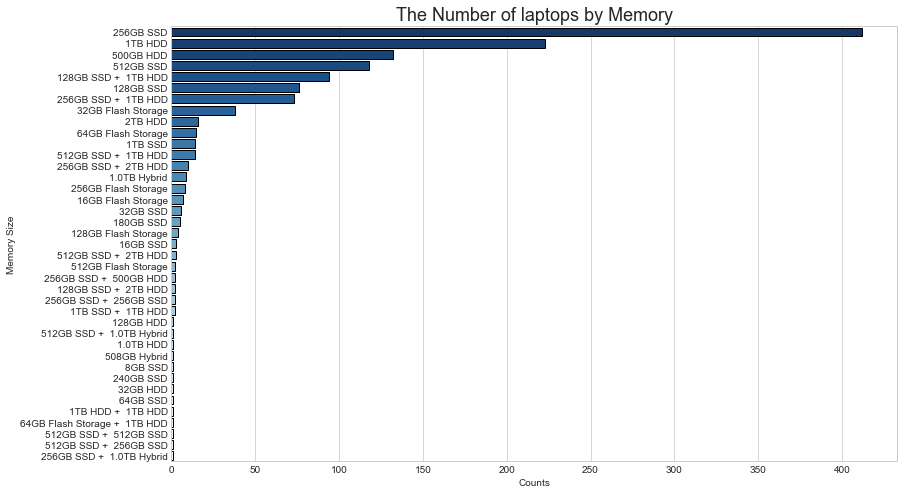

In [20]:
# plot Number of laptops by memory,

# Set the width and height of the figure
plt.figure(figsize=(13,8))

# Add title
plt.title("The Number of laptops by Memory",fontsize=18)

sns.barplot(y=laptops_Memory.index,x=laptops_Memory, palette='Blues_r', ci=False,
                edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xlabel("Counts")

# Add label for vertical axis
plt.ylabel("Memory Size");

In [21]:
laptops_Gpu=df['Gpu'].value_counts().sort_values(ascending=False).head(15)
laptops_Gpu

Intel HD Graphics 620         281
Intel HD Graphics 520         185
Intel UHD Graphics 620         68
Nvidia GeForce GTX 1050        66
Nvidia GeForce GTX 1060        48
Nvidia GeForce 940MX           43
AMD Radeon 530                 41
Intel HD Graphics 500          39
Intel HD Graphics 400          37
Nvidia GeForce GTX 1070        30
Intel HD Graphics              29
Nvidia GeForce GTX 1050 Ti     28
AMD Radeon R5 M430             22
Nvidia GeForce 930MX           20
AMD Radeon 520                 17
Name: Gpu, dtype: int64

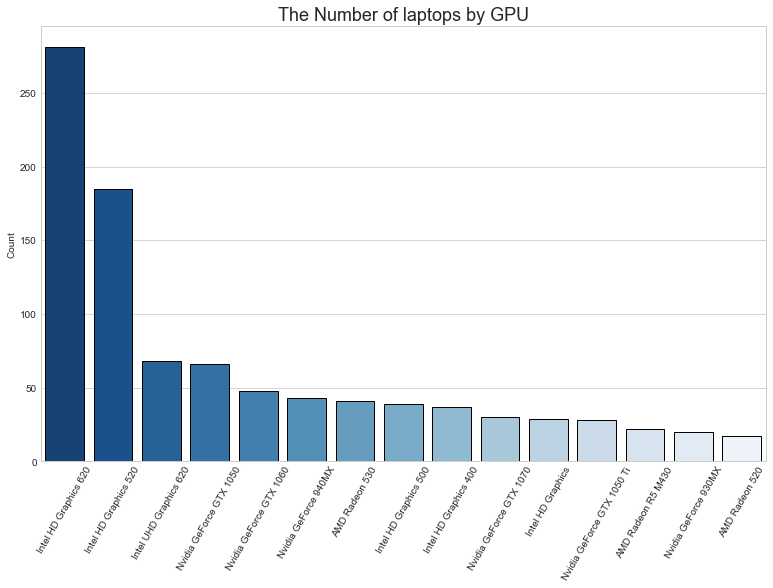

In [22]:
# plot Number of laptops by GPU,

# Set the width and height of the figure
plt.figure(figsize=(13,8))

# Add title
plt.title("The Number of laptops by GPU",fontsize=18)

sns.barplot(x=laptops_Gpu.index,y=laptops_Gpu, palette='Blues_r',ci=False,
                edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=60)

# Add label for vertical axis
plt.ylabel("Count");

The 2 most common GPUs are integrated Intel GPUs HD Graphics 620 and 520, while the third one is the Intel UHD Graphics 620

In [23]:
laptops_OpSys=df['OpSys'].value_counts().sort_values(ascending=False)
laptops_OpSys

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

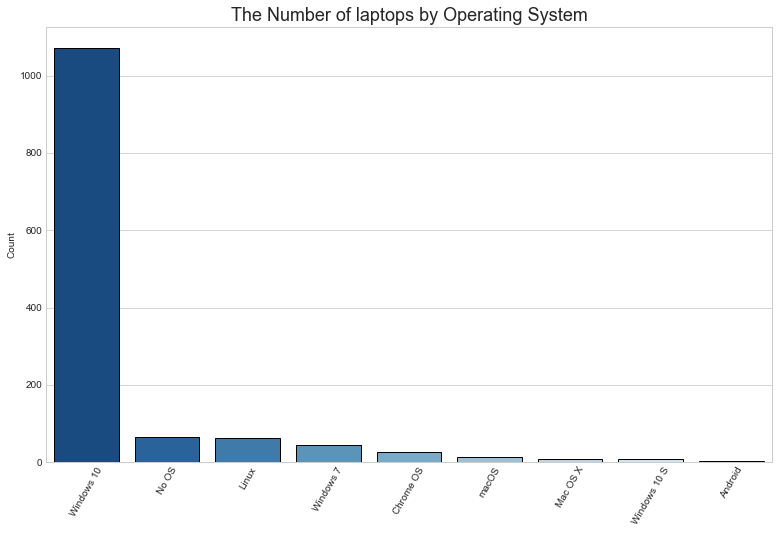

In [24]:
# plot Number of laptops by OpSys,

# Set the width and height of the figure
plt.figure(figsize=(13,8))

# Add title
plt.title("The Number of laptops by Operating System",fontsize=18)

sns.barplot(x=laptops_OpSys.index,y=laptops_OpSys, palette='Blues_r',ci=False,
                edgecolor="black")

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=60)

# Add label for vertical axis
plt.ylabel("Count");

In [25]:
laptops_Weight=df['Weight'].value_counts().sort_values(ascending=False).head(10)
laptops_Weight

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
2kg        35
2.8kg      28
1.2kg      26
1.86kg     25
2.04kg     24
Name: Weight, dtype: int64

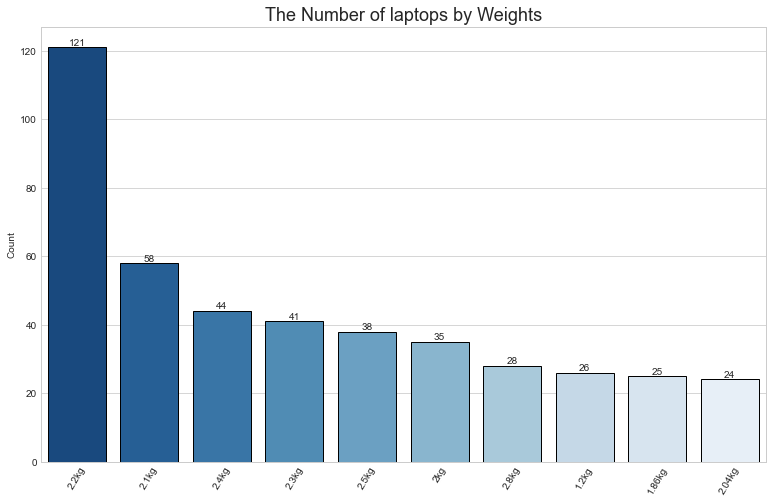

In [26]:
# plot Number of laptops by Weights,

# Set the width and height of the figure
plt.figure(figsize=(13,8))

# Add title
plt.title("The Number of laptops by Weights",fontsize=18)

ax=sns.barplot(x=laptops_Weight.index,y=laptops_Weight, palette='Blues_r', ci=False,
                edgecolor="black")
ax.bar_label(ax.containers[0])
#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=60)

# Add label for vertical axis
plt.ylabel("Count");

In [27]:
laptops_Price_euros=df['Price_euros'].value_counts().sort_values(ascending=False)
laptops_Price_euros

1499.0    14
1099.0    14
1799.0    14
899.0     11
1199.0    11
          ..
1002.0     1
915.0      1
806.0      1
1908.0     1
2699.0     1
Name: Price_euros, Length: 791, dtype: int64

In [28]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='Mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='Median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='Mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

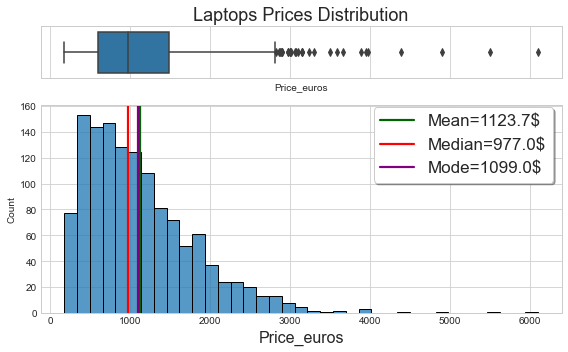

In [29]:
num_plot(df, 'Price_euros', 'Laptops Prices Distribution','$')

# <b><span style="color:#7689de"><center> Preprocessing and Preparing data for Modeling  </span></b>


In [30]:
# handle Null values
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [32]:
#Drop laptop_ID column because no need in model
df= df.drop(['laptop_ID'], axis=1)

In [33]:
# delete GB symbol from RAM column to change their data type to float and handle it correctly

df['Ram']=df['Ram'].str.replace('GB', '')
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [34]:
# delete kg symbol from Weight column to change their data type to float andhandle it correctly

df['Weight']=df['Weight'].str.replace('kg', '')
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [35]:
# chang data type of RAM and Weight columns 

df = df.astype({"Ram": int}, errors='raise')
df = df.astype({"Weight": float}, errors='raise')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 122.3+ KB


In [37]:
# add new column CPU speed extracting from column cpu

df['cpu_speed'] = df['Cpu'].str.extract(r'(\d+\.\d+GHz)')


In [38]:
# Remove GHz from processor speed and change datatype to float

df['cpu_speed']=df['cpu_speed'].str.replace('GHz', '')
df = df.astype({"cpu_speed": float}, errors='raise')



In [39]:
# add new column CPU type  extracting from column cpu and ordering from 1 to 4 in asc order

df['Cpu_type']=df['Cpu'].str.extract(r'(Intel Core i5|Intel Core i3|Intel Core i7|\+)').fillna("3")#3-->other (third highest ranking)

df['Cpu_type']=df['Cpu_type'].str.replace('(Intel Core i7)', "1") #1-->i7 (First highest ranking)
df['Cpu_type']=df['Cpu_type'].str.replace('(Intel Core i5)', "2")#2-->i5 (Second highest ranking)
df['Cpu_type']=df['Cpu_type'].str.replace('(Intel Core i3)', "4")#3-->i3 (fourth highest ranking)

df = df.astype({"Cpu_type": int}, errors='raise')

df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,cpu_speed,Cpu_type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,2
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,2
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,2
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,2


In [40]:
print(df['Cpu_type'].value_counts())

1    527
2    423
3    217
4    136
Name: Cpu_type, dtype: int64


In [41]:
#Drop CPU column because no need in this model after extracting useful data

df= df.drop(['Cpu'], axis=1)

In [42]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,cpu_speed,Cpu_type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,2
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,2
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,2
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,2


In [43]:
# add new column Touch_screen  extracting from column ScreenResolution

df['Touch_screen']=df['ScreenResolution'].str.extract(r'(Touchscreen)').fillna("0")
df['Touch_screen']=df['Touch_screen'].str.replace('(Touchscreen)', "1")


# change data type 
df = df.astype({"Touch_screen": int}, errors='raise')

df.head(5)


,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,cpu_speed,Cpu_type,Touch_screen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,2,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,2,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,2,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,1,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,2,0


In [44]:
# add new column HD_type  extracting from column ScreenResolution 


df['HD_type']=df['ScreenResolution'].str.extract(r'(4K Ultra HD|Quad HD|Full HD|\+)').fillna("2")#0-->other (second highest ranking)

df['HD_type']=df['HD_type'].str.replace('(Full HD)', "1") #1-->Full HD (First highest ranking)
df['HD_type']=df['HD_type'].str.replace('(4K Ultra HD)', "2")#2-->4K Ultra HD (third highest ranking)
df['HD_type']=df['HD_type'].str.replace('(Quad HD)', "3")#3-->Quad HD (fourth highest ranking)

# change data type 
df = df.astype({"HD_type": int}, errors='raise')


print(df['HD_type'].value_counts())
df.head(5)



1    843
2    430
3     30
Name: HD_type, dtype: int64


,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,cpu_speed,Cpu_type,Touch_screen,HD_type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,2,0,2
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,2,0,2
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,2,0,1
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,1,0,2
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,2,0,2


In [45]:
# add new column Resolution_type extracting from column ScreenResolution
df['Resolution_type'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')


print(df['Resolution_type'].value_counts())




1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: Resolution_type, dtype: int64


In [46]:
# add new column IPS  extracting from column ScreenResolution

df['IPS']=df['ScreenResolution'].str.extract(r'(IPS Panel)').fillna("0")
df['IPS']=df['IPS'].str.replace('(IPS Panel)', "1")

# change data type
df = df.astype({"IPS": int}, errors='raise')

df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,cpu_speed,Cpu_type,Touch_screen,HD_type,Resolution_type,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,2,0,2,2560x1600,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,2,0,2,1440x900,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,2,0,1,1920x1080,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,1,0,2,2880x1800,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,2,0,2,2560x1600,1


In [47]:
#Drop ScreenResolution column because no need in this model after extracting useful data

df= df.drop(['ScreenResolution'], axis=1)

In [48]:
# add new column Memory type  extracting from column Memory 


df['Memory_type']=df['Memory'].str.extract(r'(SSD|HDD|Flash Storage|Hybrid|\+)').fillna("0")

df['Memory_type']=df['Memory_type'].str.replace('(SSD)', "1") #1-->Full HD (First highest ranking)
df['Memory_type']=df['Memory_type'].str.replace('(HDD)', "2")#2-->4K Ultra HD (third highest ranking)
df['Memory_type']=df['Memory_type'].str.replace('(Flash Storage)', "3")#3-->Quad HD (fourth highest ranking)
df['Memory_type']=df['Memory_type'].str.replace('(Hybrid)', "4")#4-->Quad HD (fourth highest ranking)



# change data type 
df = df.astype({"Memory_type": int}, errors='raise')
print(df['Memory_type'].value_counts())
df.head(5)


1    843
2    375
3     75
4     10
Name: Memory_type, dtype: int64


,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,cpu_speed,Cpu_type,Touch_screen,HD_type,Resolution_type,IPS,Memory_type
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,2,0,2,2560x1600,1,1
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,2,0,2,1440x900,0,3
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,2,0,1,1920x1080,0,1
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,1,0,2,2880x1800,1,1
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,2,0,2,2560x1600,1,1


In [49]:
#Drop Memory column because no need in this model after extracting useful data

df= df.drop(['Memory'], axis=1)

In [50]:
# add new column OpSys  extracting from column Op_Sys 


df['Op_Sys']=df['OpSys'].str.extract(r'(Windows|macOS|Mac OS|Linux| \+)').fillna("2")#0-->other (second highest ranking)
df['Op_Sys']=df['Op_Sys'].str.replace('(Windows)', "1")#1-->Mac (first highest ranking)
df['Op_Sys']=df['Op_Sys'].str.replace('(Linux)', "3")#3-->Mac (third highest ranking)
df['Op_Sys']=df['Op_Sys'].str.replace('(Mac OS)', "4")#4-->Mac (fourth highest ranking)
df['Op_Sys']=df['Op_Sys'].str.replace('(macOS)', "4")#4-->Mac(it have 2 format type for same Mac Os  (fourth highest ranking)


# change data type 
df = df.astype({"Op_Sys": int}, errors='raise')


print(df['Op_Sys'].value_counts())

df.head(5)





1    1125
2      95
3      62
4      21
Name: Op_Sys, dtype: int64


,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,cpu_speed,Cpu_type,Touch_screen,HD_type,Resolution_type,IPS,Memory_type,Op_Sys
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,2,0,2,2560x1600,1,1,4
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,2,0,2,1440x900,0,3,4
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,2.5,2,0,1,1920x1080,0,1,2
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,1,0,2,2880x1800,1,1,4
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,2,0,2,2560x1600,1,1,4


In [51]:
#Drop OpSys column because no need in this model after extracting useful data

df= df.drop(['OpSys'], axis=1)

In [52]:
#convert all categorical columns to one hot encodding
cat_columns = sorted([col for col in df.columns if df[col].dtype=="O"])
cat_columns

['Company', 'Gpu', 'Product', 'Resolution_type', 'TypeName']

In [53]:
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(df, columns=cat_columns, drop_first=True).shape)

Dataframe encoded by OHE dimension :  (1303, 774)


In [54]:
#label encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder= LabelEncoder()
for col in cat_columns :
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [55]:
#remove the nan row
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()

In [56]:
df

,index,Company,Product,TypeName,Inches,Ram,Gpu,Weight,Price_euros,cpu_speed,Cpu_type,Touch_screen,HD_type,Resolution_type,IPS,Memory_type,Op_Sys
0,0,1,300,4,13.3,8,58,1.37,1339.69,2.3,2,0,2,10,1,1,4
1,1,1,301,4,13.3,8,51,1.34,898.94,1.8,2,0,2,1,0,3,4
2,2,7,50,3,15.6,8,53,1.86,575.00,2.5,2,0,1,3,0,1,2
3,3,1,300,4,15.4,16,9,1.83,2537.45,2.7,1,0,2,12,1,1,4
4,4,1,300,4,13.3,8,59,1.37,1803.60,3.1,2,0,2,10,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,1298,10,580,0,14.0,4,47,1.80,638.00,2.5,1,1,1,3,1,1,1
1213,1299,10,588,0,13.3,16,47,1.30,1499.00,2.5,1,1,3,13,1,1,1
1214,1300,10,196,3,14.0,2,40,1.50,229.00,1.6,3,0,2,0,0,3,1
1215,1301,7,2,3,15.6,6,21,2.19,764.00,2.5,1,0,2,0,0,2,1


In [57]:
#divide data to input x and output y
X = df.loc[:,['cpu_speed','Cpu_type','Resolution_type','Inches','Ram','Weight','IPS','Memory_type']]
Y = df['Price_euros']

In [58]:
X

,cpu_speed,Cpu_type,Resolution_type,Inches,Ram,Weight,IPS,Memory_type
0,2.3,2,10,13.3,8,1.37,1,1
1,1.8,2,1,13.3,8,1.34,0,3
2,2.5,2,3,15.6,8,1.86,0,1
3,2.7,1,12,15.4,16,1.83,1,1
4,3.1,2,10,13.3,8,1.37,1,1
...,...,...,...,...,...,...,...,...
1212,2.5,1,3,14.0,4,1.80,1,1
1213,2.5,1,13,13.3,16,1.30,1,1
1214,1.6,3,0,14.0,2,1.50,0,3
1215,2.5,1,0,15.6,6,2.19,0,2


In [59]:
Y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1212     638.00
1213    1499.00
1214     229.00
1215     764.00
1216     369.00
Name: Price_euros, Length: 1217, dtype: float64

In [60]:
#data scaling
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
x_scaled = sc.fit_transform(X)

In [61]:
x_scaled

array([[-0.00835294,  0.17206294,  2.18021371, ..., -0.96865674,
         1.53684041, -0.63816273],
       [-0.98580722,  0.17206294, -0.68858504, ..., -1.01268002,
        -0.65068565,  2.47463904],
       [ 0.38262877,  0.17206294, -0.0510742 , ..., -0.24960992,
        -0.65068565, -0.63816273],
       ...,
       [-1.37678893,  1.28589589, -1.00734045, ..., -0.77788922,
        -0.65068565,  2.47463904],
       [ 0.38262877, -0.94177001, -1.00734045, ...,  0.23464611,
        -0.65068565,  0.91823815],
       [-1.37678893,  1.28589589, -1.00734045, ...,  0.24932053,
        -0.65068565,  0.91823815]])

In [62]:
#convert y values to categorical values
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)

In [63]:
y_transformed

array([488, 306, 136, ...,   8, 229,  61])

# <b><span style="color:#7689de"> DATA VISUALIZATION </span></b>

# Multivarite Features Vizualization:
Visualize the relationship between independent (X_Features) and dependent (Y_Target= Price).

# The distibution between prices and Company

In [64]:
# we checked again for the laptops companies and see which has a few laptops in the dataset and drop the outlier:
df['Company'].value_counts()

4     281
10    278
7     249
2     149
0      86
11     54
16     48
1      21
15      9
14      7
12      7
13      6
18      4
17      4
3       3
6       3
5       3
9       3
8       2
Name: Company, dtype: int64

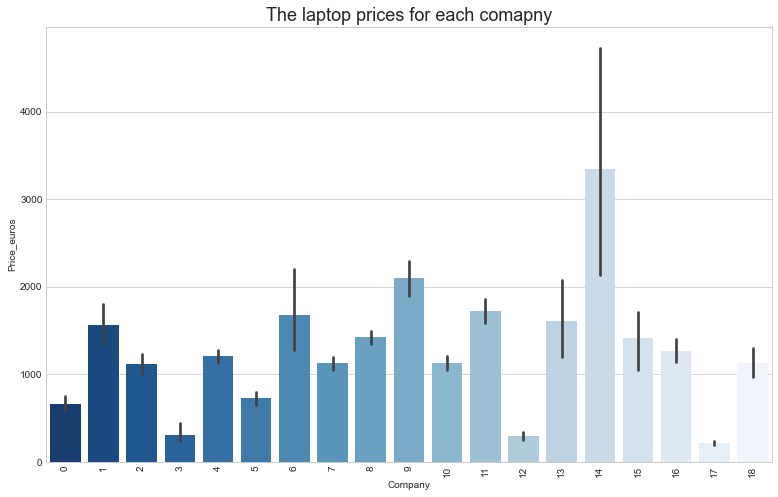

In [65]:
# Set the width and height of the figure
plt.figure(figsize=(13,8))

# Add title
plt.title("The laptop prices for each comapny",fontsize=18)
sns.barplot(x=df['Company'],y=df['Price_euros'], palette='Blues_r')
plt.xticks(rotation='vertical')
plt.show()

we note some companies has less than 10 laptops so we will exclude these companies from the dataset

In [66]:
Hieghest_company = df['Company'].value_counts().index[:8].tolist()
Hieghest_company

[4, 10, 7, 2, 0, 11, 16, 1]

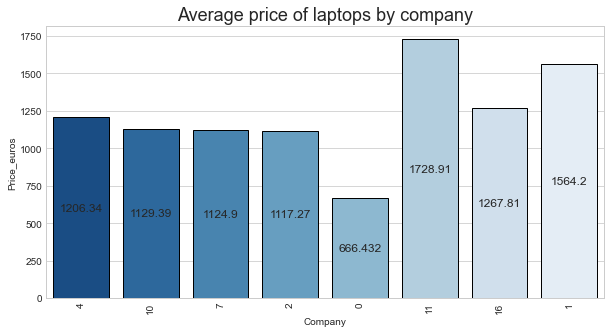

In [67]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Company', y='Price_euros', data=df[df['Company'].isin(Hieghest_company)],
                order=Hieghest_company, 
                palette='Blues_r', 
                ci=False,
                edgecolor="black")
plt.xticks(rotation=90);
ax.bar_label(ax.containers[0],size=12,label_type='center')
plt.title('Average price of laptops by company',fontsize=18)
plt.show()




# The distibution between prices and RAM

In [68]:
from scipy import stats

In [69]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df,line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x,fontsize=18)
    plt.show()

    return slope, intercept

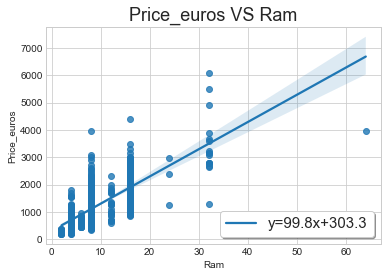

In [70]:
slope, intercept = lr_plot(df,'Ram','Price_euros', 'lower right')

# The distibution between prices and Inches

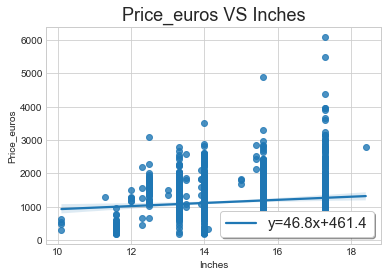

In [71]:
slope, intercept = lr_plot(df,'Inches','Price_euros', 'lower right')

In [72]:
df.columns

Index(['index', 'Company', 'Product', 'TypeName', 'Inches', 'Ram', 'Gpu',
       'Weight', 'Price_euros', 'cpu_speed', 'Cpu_type', 'Touch_screen',
       'HD_type', 'Resolution_type', 'IPS', 'Memory_type', 'Op_Sys'],
      dtype='object')

# The distibution between prices and Weight

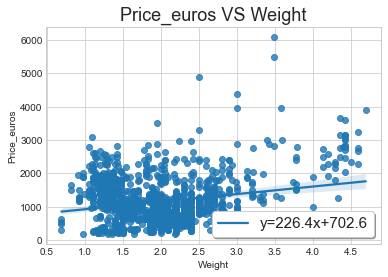

In [73]:
slope, intercept = lr_plot(df,'Weight','Price_euros', 'lower right')

# The distibution between prices and cpu_speed

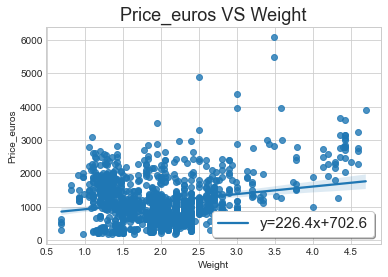

In [74]:
slope, intercept = lr_plot(df,'Weight','Price_euros', 'lower right')

# The distibution between prices and Cpu_type

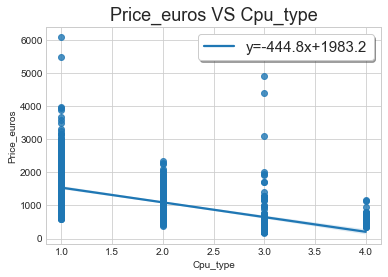

In [75]:
slope, intercept = lr_plot(df,'Cpu_type','Price_euros', 'upper right')

# The distibution between prices and Touch_screen

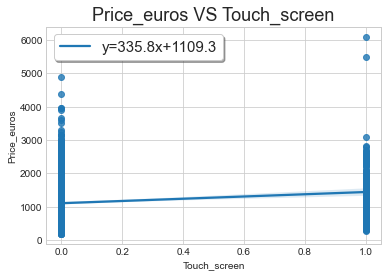

In [76]:
slope, intercept = lr_plot(df,'Touch_screen','Price_euros', 'upper left')

# The distibution between prices and HD_type

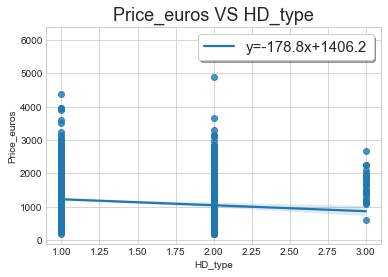

In [77]:
slope, intercept = lr_plot(df,'HD_type','Price_euros', 'upper right')

# The distibution between prices and Resolution_type

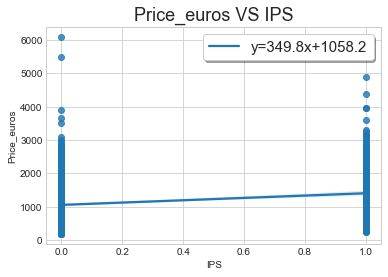

In [78]:
slope, intercept = lr_plot(df,'IPS','Price_euros', 'upper right')

# The distibution between prices and Memory_type

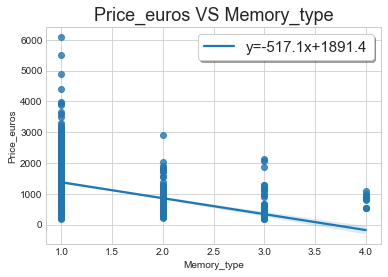

In [79]:
slope, intercept = lr_plot(df,'Memory_type','Price_euros', 'upper right')

# The distibution between prices and Op_Sys

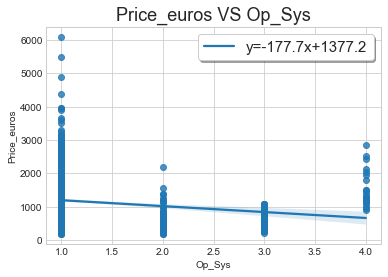

In [80]:
slope, intercept = lr_plot(df,'Op_Sys','Price_euros', 'upper right')

# Correlation Matrix

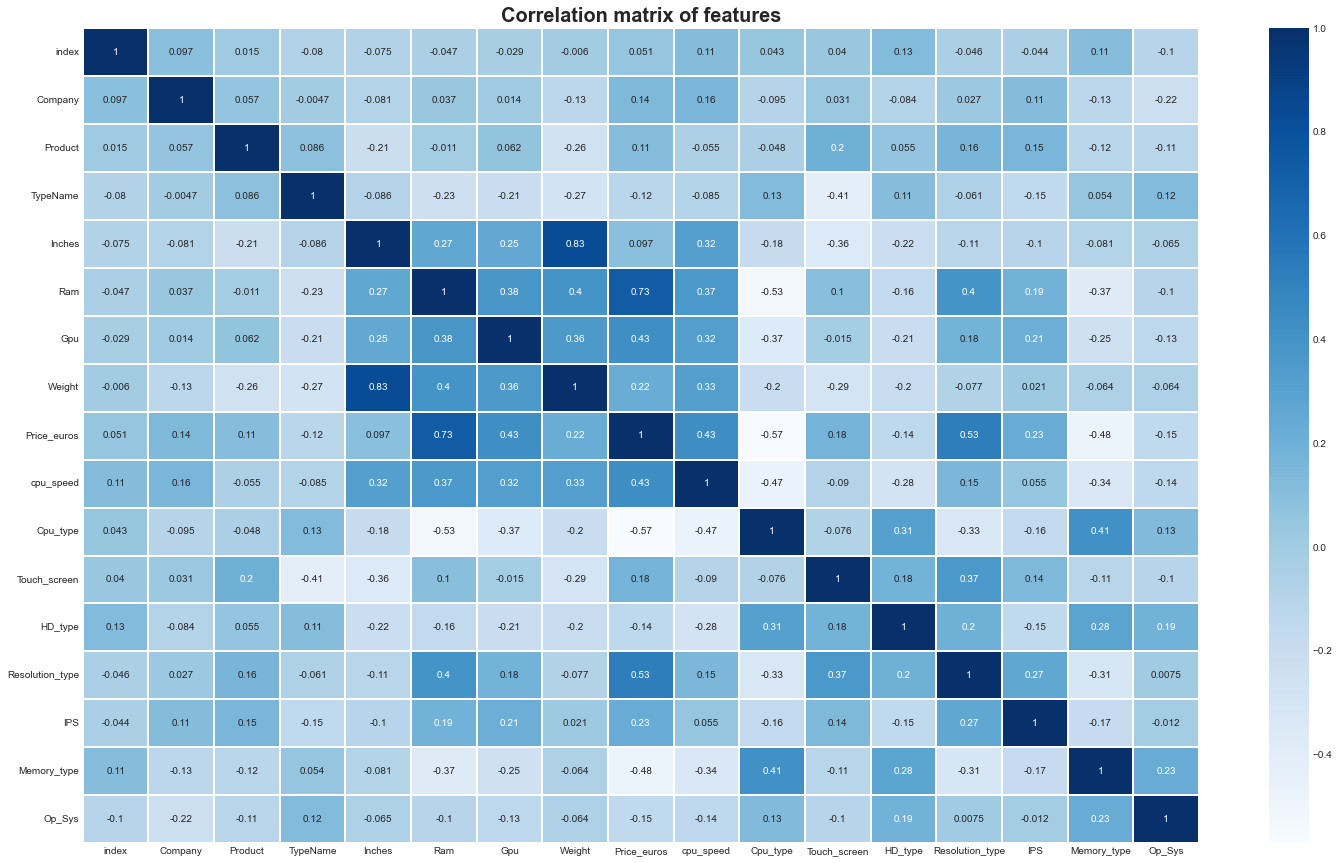

In [81]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.title("Correlation matrix of features",fontweight="bold",fontsize=20)
plt.show()

# <b><span style="color:#7689de"> Machine Learning Pipeline </span></b>

In [82]:
#Import libraries and modules
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [106]:
#Splitting features/target and train/test data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_transformed,test_size=.30 ,random_state=2,shuffle=True)

### Making pipelins

In [107]:
#LogisticRegression model
pipeline_LogisticReg=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_reg',LogisticRegression(random_state=10))])

In [108]:
#KNeighborsRegressor model
pipeline_KNR=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('KNR_reg',KNeighborsRegressor())])

In [109]:
#DecisionTreeRegressor model
pipeline_DecisionTreeReg=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('DTR_reg',DecisionTreeRegressor())])

In [110]:
#SVR model
pipeline_SVR=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('SVR_reg',SVR())])

In [111]:
#XGBRegressor model 
pipeline_XGBReg=Pipeline([('scalar5',StandardScaler()),
                     ('pca5',PCA(n_components=2)),
                     ('XGB_reg',XGBRegressor())])

In [112]:
#the list of pipelines
pipelines = [pipeline_LogisticReg, pipeline_KNR, pipeline_DecisionTreeReg,pipeline_SVR,pipeline_XGBReg]

In [113]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'KNeighborsRegressor', 2: 'DecisionTreeRegressor', 3:'SVR', 4:'XGBRegressor'}

In [114]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [115]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [116]:
#Models evaluation
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

Logistic Regression Test Accuracy: 0.0273224043715847
KNeighborsRegressor Test Accuracy: 0.6762646565125429
DecisionTreeRegressor Test Accuracy: 0.5544033104897553
SVR Test Accuracy: 0.4223231757860819
XGBRegressor Test Accuracy: 0.6551795557018605


In [117]:

for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Regressor with best accuracy:{}'.format(pipe_dict[best_classifier]))

Regressor with best accuracy:KNeighborsRegressor
